### Robot Learning

### Assignment 2

Solutions are due on 26.04.2022 before the lecture.

### Introduction

Consider the following $9 \times 9$ grid world:

<img src="helpers/gridworld_sketch_legend.png" alt="Grid World" title="Grid World" width="650"/>

The agent may start in any cell that is not an obstacle nor the goal.

It can choose between eight actions, which correspond to moving to the directions 

$$a_i \in \{NW,      N,      NE,     E,     SE,    S,     SW,     W\}$$

These are indexed according to the order above, i.e. $a_0 = NW$ and $a_6 = SW$.

The agent must be careful, for the actions are non-deterministic! The agent moves with probability $0.7$ into the desired
direction, but with probability $0.2$ deviates $45^{\circ}$ to the left and with probability $0.1$ deviates $45^{\circ}$ 
to the right of the desired direction due to treacherous gusts unexpectedly sweeping the grid.

The rewards are structured as follows:

* When it reaches a blue cell, it receives a little snack of 15 points.

* When it attempts to enter a red obstacle cell, it receives -30 points and stays in the cell it came from.

* When it attempts to leave the grid, it receives -30 points and stays in the cell it came from.

* When the agent reaches the green goal cell, it receives 150 points and the episode ends.

* All other actions entering a white cell receive -1 point.

## Task 2.1

To familiarize yourself with the environment above, answer the following questions:

* The agent is at $s = (y_s, x_s) = (3, 5)$ and wants to execute $a_5$. What is the probability $P^a_{s,s'}$ for $s' =(4,6)$?


* The agent is at $s = (3, 7)$ and wants to execute $a_3$. What is the expected value of the reward?

<div style="text-align: right; font-weight:bold"> 1 + 2 = 3 Points </div>

1. $0.2$
2. $(0.7*150)+(0.2*-1)+(0.1*-1)=104.7$

## Task 2.2)

Using the *Iterative Policy Evaluation* Algorithm, compute the value $V^{\pi}(s)$ of all accessible cells $s$ for a policy $\pi(s,a)$ that chooses with probability $0.5$ a random action and otherwise attempts to move to the right.

Intialize $V(s)$ with zero, use a discount parameter of $\gamma=0.9$ and show your results by printing your state values $V^{\pi}(s)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

#### Note

For your convenience, you are provided the helper function *getNextStatesRewardsAndProbabilities(state, action)* which returns for a given state $s$ and an action $a$ a list of 3 -tuples of the form

$$[(s_0', R^a_{s,s_0'}, P^a_{s,s_0'}), (s_1', R^a_{s,s_1'}, P^a_{s,s_1'}), \dots]$$

where $s_i'$ are all future states with $P^a_{s,s_i'} \neq 0$. Here $s = (y, x)$ and $s_i' = (y_i', x_i')$ are both tuples of integers, $a \in {0, \dots, 7}$ is an integer, and $R^a_{s,s_i'}$, $P^a_{s,s_i'}$ are both floats.

Also, please find below some data structures which you might find helpful. Create code and text cells as necessary to present your solution!

In your implementation, $V(s)$ should be a $9 \times 9$ numpy array and $\pi(s,a)$ should be a $9 \times 9 \times 8$ numpy array, where $\sum_a \pi(s,a) = 1$ for all s!

In [1]:
import numpy as np
from helpers.utils import getNextStatesRewardsAndProbabilities
%matplotlib inline

#this is a list of all states
states = [(y,x) for y in range(9) for x in range(9)]
#this is a list of all states containing obstacles
obstacles = [(1,5), (1,7), (2,1), (2,2), (2,3), (2,4), (2,5), (2,7),\
             (3,1), (3,6), (4,3), (4,4), (4,5), (5,7), \
             (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), \
             (7,8), (8,4), (8,8)]
#this is a list containing all blue cells
snacks = [(0,0), (0,1), (0,2), (0,7), (0,8), (1,8), \
         (3,2), (3,3), (3,4), (3,5), (4,2), \
         (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), \
         (8,1), (8,2), (8,3), (8,5), (8,6)]
#this is a list containing all goal states
terminalStates = [(3,8)]
#this is an array containing all actions
actions = np.array([0, 1, 2, 3, 4, 5, 6, 7]) #[NW,      N,      NE,     E,     SE,    S,     SW,     W]
#example of how to unpack getNextStatesRewardsAndProbabilities(state, action):
#create dummy state and action
s_test = (0,6)
a_test = 3
#call helper function and loop over the return values
for sPrime, R, P in getNextStatesRewardsAndProbabilities(state=s_test, action=a_test):
    print('sPrime:', sPrime, 'R:', R, 'P:', P)
    
#once you have state values V, you can print them with okay'ish formatting like so:
#print("State Values:")
#print(np.around(V, 1))

sPrime: (0, 6) R: -30.0 P: 0.2
sPrime: (0, 7) R: 15.0 P: 0.7
sPrime: (0, 6) R: -30.0 P: 0.1


In [2]:
def define_policy(pi):
    '''Defines the policy'''
    for s in states:
        if np.random.random() < 0.5: 
            # Picking random action
            pi[s][np.random.choice(actions)]=1
        else:
            # a_3 to move right side of the grid
            pi[s][3]=1
    return pi

In [3]:
# Initializing V(s) with zeros
V = np.zeros((9,9))

# Initializing and defining Policy
pi = np.zeros((9,9,8))
define_policy(pi)

# Discount factor
gamma = 0.9
# Small positive integer
theta = 1e-8

# Iterative Policy Evaluation algorithm
while True:
    delta = 0
    for state in states:
        v = V[state]
        update_value = 0
        for action in actions:
            for sPrime, R, P in getNextStatesRewardsAndProbabilities(state,action):
                update_value += pi[state][action] * P * ( R + gamma*V[sPrime])
        V[state] = update_value
        delta = max(delta,abs(v-V[state]))
    if delta < theta:
        break

# Result
print("State Values:")
print(np.around(V, 1))

State Values:
[[-160.5 -178.2 -212.1 -185.6 -187.9 -202.4 -218.4 -255.5 -300. ]
 [-251.1 -263.9 -169.  -249.2 -300.  -191.6 -239.2 -213.5 -300. ]
 [-256.1 -188.9 -236.9 -272.2 -261.3 -218.2 -233.9 -252.7 -300. ]
 [-160.9 -185.1 -219.6 -256.8 -300.  -210.4 -218.2 -192.6 -300. ]
 [-173.3 -185.1 -216.2 -240.2 -200.1 -157.8 -160.6 -170.8 -300. ]
 [-184.3 -207.1 -187.7 -174.1 -186.4 -200.6 -237.6 -202.6 -205.3]
 [-184.1 -172.7 -171.1 -179.1 -180.  -219.3 -185.3 -218.4 -202.9]
 [ -77.7  -96.  -115.7 -136.1 -144.5 -180.  -207.2 -222.1 -263.2]
 [ -71.9 -102.5 -131.6 -167.9 -109.5 -123.5 -255.9 -300.  -229.2]]


## Task 2.3)

Now it is time to find a good policy. Use the *Policy Iteration* algorithm to compute the optimal value $V^*(s)$ for each accessible cell.

Retrieve the resulting optimal-policy $\pi^*(s)$. To obtain a greedy policy given $V(s)$, make use of:

$$\pi_{greedy}(s) := \operatorname{argmax}_a Q(s,a) = \operatorname{argmax}_a \sum_{s'}P_{ss'}^a\cdot[R_{ss'}^a+\gamma\cdot V(s')]$$

As implied by these terms, we recommend using intermediate state-action $Q$-values, shaped $9 \times 9 \times 8$ for this step!

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

In [4]:
from helpers.utils import drawPolicy
#show policy using helper function as below
#usage of the helper function, where pi is a (9,9,8) numpy array representing a deterministic policy:
#drawPolicy(pi)
#deterministic here means that one action per state has probability 1 and all others have probability 0
#this will plot arrows representing your policies into the grid world.

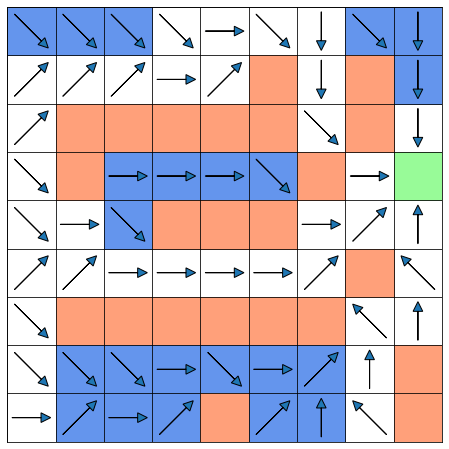

State Values:
[[208.3 224.8 247.8 281.7 313.1 378.2 371.8 467.3 457.4]
 [213.5 232.4 249.4 278.8 319.5 452.6 446.2 537.5 527.6]
 [198.8 267.1 312.6 358.9 412.6 452.6 532.4 632.5 626.7]
 [224.4 269.1 307.1 353.4 407.1 469.4 562.2 632.4 568.4]
 [232.3 269.7 279.7 338.9 407.5 486.4 559.3 633.4 630.5]
 [234.1 259.8 276.1 335.4 404.  483.5 544.8 555.4 547.5]
 [228.8 245.7 282.5 341.8 410.4 468.6 468.6 456.9 459.2]
 [243.  256.1 272.6 280.6 322.7 342.6 385.9 393.2 399. ]
 [240.1 257.  268.1 290.5 322.7 351.6 353.6 355.5 338.2]]


In [5]:
# Initializing V(s) with zeros
V = np.zeros((9,9))

# Initializing and defining Policy
pi = np.zeros((9,9,8))
define_policy(pi)

# Initilizing Q(s,a) with zeros
Q = np.zeros((9,9,8))

# Discount factor
gamma = 0.9
# Flag
policy_stable = False 

# Policy Iteration algorithm
while policy_stable is False :
    # Policy Evaluation 
    while True:
        delta = 0
        for state in states:
            v = V[state]
            update_value = 0
            for action in actions:
                for sPrime, R, P in getNextStatesRewardsAndProbabilities(state,action):
                    update_value += pi[state][action] * P * ( R + gamma*V[sPrime])
            V[state] = update_value
            delta = max(delta,abs(v-V[state]))
        if delta < theta:
            break
    # Policy Improvement
    policy_stable = True
    for state in states:
        b = np.argmax(pi[state])   
        for action in actions:
            for sPrime, R, P in getNextStatesRewardsAndProbabilities(state,action):
                Q[state][action] += P * ( R + gamma*V[sPrime])
        pi[state][np.argmax(pi[state])] = 0
        pi[state][np.argmax(Q[state])]  = 1         
        if b != np.argmax(Q[state]):
            policy_stable = False 

# Result
drawPolicy(pi)
print("State Values:")
print(np.around(V, 1))

## Task 2.4)

Verify your results from the previous task by using the *Value Iteration* algorithm to compute the optimal value $V^*(s)$ for each cell. Make sure to reinitialize $V(s)$ with zero.

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

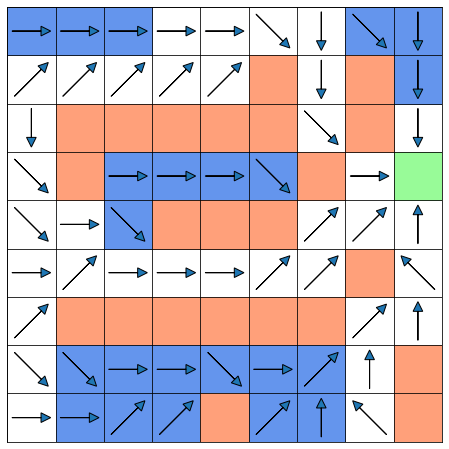

State Values:
[[175.2 192.2 211.7 249.8 293.2 355.1 348.7 440.5 430.6]
 [184.2 201.2 220.7 255.6 299.6 425.9 419.5 506.5 496.6]
 [163.4 246.1 288.3 330.8 380.1 425.9 501.5 596.7 590.9]
 [204.7 246.7 282.8 325.3 374.6 431.6 515.6 596.5 526.8]
 [211.8 247.  254.2 309.4 373.4 443.9 515.6 597.5 594.6]
 [208.9 237.4 250.7 305.9 369.8 443.9 511.3 521.7 516. ]
 [201.4 216.2 257.1 312.3 376.2 437.5 437.5 435.6 432. ]
 [224.4 239.4 244.  268.3 308.5 326.6 367.4 373.8 379.6]
 [221.5 234.9 253.  278.2 308.5 335.6 337.3 339.2 321.6]]


In [9]:
# Initializing V(s) with zeros
V = np.zeros((9,9))


# Value Iteration algorithm

# Truncated Policy Evaluation 
while True:
    delta = 0
    for state in states:
        v = V[state]
        update_value = 0
        action = np.argmax(pi[state]) 
        for sPrime, R, P in getNextStatesRewardsAndProbabilities(state,action):
            update_value += pi[state][action] * P * ( R + gamma*V[sPrime])
        V[state] = update_value
        delta = max(delta,abs(v-V[state]))
    if delta < theta:
        break
# Policy Improvement
for state in states:

    for action in actions:
        for sPrime, R, P in getNextStatesRewardsAndProbabilities(state,action):
            Q[state][action] += P * ( R + gamma*V[sPrime])
    if np.argmax(pi[state]) != np.argmax(Q[state]):
        print('change')
    pi[state][np.argmax(pi[state])] = 0
    pi[state][np.argmax(Q[state])]  = 1         
        

# Result
drawPolicy(pi)
print("State Values:")
print(np.around(V, 1))

## Task 2.5)

Modify your implementation of *Value Iteration* or *Policy Iteration* to ignore the random deviations in the environment. This can be achieved by calling *getNextStatesRewardsAndProbabilities(state, action, deviation=False)*.

Present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$. How and why have your state values and policy changed?

<div style="text-align: right; font-weight:bold"> 3 Points </div>

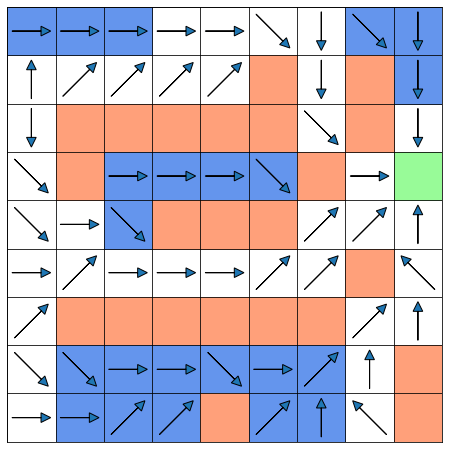

State Values:
[[362.5 386.1 412.4 459.3 511.4 569.4 569.4 649.7 649.7]
 [341.3 386.1 412.4 459.3 511.4 633.7 633.7 705.3 705.3]
 [345.1 467.4 502.6 541.8 585.4 633.7 705.3 784.7 784.7]
 [384.5 428.4 502.6 541.8 585.4 633.7 705.3 784.7 705.3]
 [384.5 428.4 459.3 511.4 569.4 633.7 705.3 784.7 784.7]
 [384.5 428.4 459.3 511.4 569.4 633.7 705.3 705.3 705.3]
 [384.5 412.4 459.3 511.4 569.4 633.7 633.7 633.7 633.7]
 [372.9 397.6 425.1 455.7 489.7 527.4 569.4 569.4 569.4]
 [372.9 397.6 425.1 455.7 489.7 527.4 527.4 527.4 511.4]]


In [7]:
# Initializing V(s) with zeros
V = np.zeros((9,9))

# Initializing and defining Policy
pi = np.zeros((9,9,8))
define_policy(pi)

# Initilizing Q(s,a) with zeros
Q = np.zeros((9,9,8))

# Discount factor
gamma = 0.9
# Flag
policy_stable = False 

# Policy Iteration algorithm
while policy_stable is False :
    # Policy Evaluation 
    while True:
        delta = 0
        for state in states:
            v = V[state]
            update_value = 0
            for action in actions:
                for sPrime, R, P in getNextStatesRewardsAndProbabilities(state,action,deviation=False):
                    update_value += pi[state][action] * P * ( R + gamma*V[sPrime])
            V[state] = update_value
            delta = max(delta,abs(v-V[state]))
        if delta < theta:
            break
    # Policy Improvement
    policy_stable = True
    for state in states:
        b = np.argmax(pi[state])   
        for action in actions:
            for sPrime, R, P in getNextStatesRewardsAndProbabilities(state,action,deviation=False):
                Q[state][action] += P * ( R + gamma*V[sPrime])
        pi[state][np.argmax(pi[state])] = 0
        pi[state][np.argmax(Q[state])]  = 1         
        if b != np.argmax(Q[state]):
            policy_stable = False 

# Result
drawPolicy(pi)
print("State Values:")
print(np.around(V, 1))

Please answer in this text cell.